# Sujet 6 : Autour du paradoxe de Simpson

## Rappel du contexte

_En 1972-1974, à Whickham, une ville du nord-est de l'Angleterre, située à environ 6,5 kilomètres au sud-ouest de Newcastle upon Tyne, un sondage d'un sixième des électeurs a été effectué afin d'éclairer des travaux sur les maladies thyroïdiennes et cardiaques (Tunbridge et al. 1977). Une suite de cette étude a été menée vingt ans plus tard (Vanderpump et al. 1995). Certains des résultats avaient trait au tabagisme et cherchaient à savoir si les individus étaient toujours en vie lors de la seconde étude. Par simplicité, nous nous restreindrons aux femmes et parmi celles-ci aux 1314 qui ont été catégorisées comme "fumant actuellement" ou "n'ayant jamais fumé". Il y avait relativement peu de femmes dans le sondage initial ayant fumé et ayant arrêté depuis (162) et très peu pour lesquelles l'information n'était pas disponible (18). La survie à 20 ans a été déterminée pour l'ensemble des femmes du premier sondage._

## Préparation des donées

### Téléchargement des données

Les données autour du Paradoxe de Simpson sont accessibles via le gitlab INRIA, à l'adresse : 

In [2]:
data_url = "https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv?inline=false"

On veut éviter une disparation potentielle des données du serveur : on fait donc une copie locale de ce jeu de données, et on travaillera par la suite avec cette copie locale. Ca nous permet également de ne pas télécharger à chaque éxécution du code. On vérifie avant le téléchargement qu'une copie locale n'existe pas déjà.

In [3]:
data_file = "data.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

### Vérification des données

Avant de commencer notre analyse, on vérifie qu'on a bien les données qu'on souhaite, et on vérifie si on n'a pas des données manquantes, ou abérantes. 

On affiche donc nos données : 

In [4]:
import pandas as pd
data_file
raw_data = pd.read_csv(data_file)
raw_data

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
5        No  Alive  36.8
6        No  Alive  23.8
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
11       No   Dead  66.0
12      Yes  Alive  49.2
13       No  Alive  58.4
14       No   Dead  60.6
15       No  Alive  25.1
16       No  Alive  43.5
17       No  Alive  27.1
18       No  Alive  58.3
19      Yes  Alive  65.7
20       No   Dead  73.2
21      Yes  Alive  38.3
22       No  Alive  33.4
23      Yes   Dead  62.3
24       No  Alive  18.0
25       No  Alive  56.2
26      Yes  Alive  59.2
27       No  Alive  25.8
28       No   Dead  36.9
29       No  Alive  20.2
...     ...    ...   ...
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1286     No  Alive  63.1
1287     No  Alive  60.8
1288    Yes   Dead  39.3
1289     No  Alive  36.7
1290     No  Alive  63.8
1291     No   Dead  71.3
1292     No  Alive  57.7
1293     No  Alive  63.2
1294     No  Alive  46.6
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1298     No  Alive  39.7
1299    Yes   Dead  60.0
1300     No   Dead  71.0
1301     No  Alive  20.5
1302     No  Alive  44.4
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1306     No   Dead  61.4
1307    Yes  Alive  43.0
1308     No  Alive  42.1
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]

On note bien qu'on a nos trois colonnes :
- __Smoker__ : si la personne fume ou non
- __Status__ : si la personne est vivante ou décédée au moment de la seconde étude
- __Age__ : son âge lors du premier sondage 

On vérifie ensuite qu'on n'a pas de données abérantes.

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Smoker, Status, Age]
Index: []

Il n'y a à priori pas de données manquantes. 

In [6]:
data = raw_data.copy()
data

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
5        No  Alive  36.8
6        No  Alive  23.8
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
11       No   Dead  66.0
12      Yes  Alive  49.2
13       No  Alive  58.4
14       No   Dead  60.6
15       No  Alive  25.1
16       No  Alive  43.5
17       No  Alive  27.1
18       No  Alive  58.3
19      Yes  Alive  65.7
20       No   Dead  73.2
21      Yes  Alive  38.3
22       No  Alive  33.4
23      Yes   Dead  62.3
24       No  Alive  18.0
25       No  Alive  56.2
26      Yes  Alive  59.2
27       No  Alive  25.8
28       No   Dead  36.9
29       No  Alive  20.2
...     ...    ...   ...
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1286     No  Alive  63.1
1287     No  Alive  60.8
1288    Yes   Dead  39.3
1289     No  Alive  36.7
1290     No  Alive  63.8
1291     No   Dead  71.3
1292     No  Alive  57.7
1293     No  Alive  63.2
1294     No  Alive  46.6
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1298     No  Alive  39.7
1299    Yes   Dead  60.0
1300     No   Dead  71.0
1301     No  Alive  20.5
1302     No  Alive  44.4
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1306     No   Dead  61.4
1307    Yes  Alive  43.0
1308     No  Alive  42.1
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]

On vérifie également qu'il n'y a pas de données abérantes, c'est à dire de personnes dont l'âge n'est pas absurde. Pour cela, on récupère le minimum et le maximum de la colonne __Age__. Un age négatif sera par exemple considéré comme abérant.

In [7]:
age_min = data["Age"].min()
age_max = data["Age"].max()

print("L'age min est : ", age_min)
print("L'age max est : ", age_max)

L'age min est :  18.0
L'age max est :  89.9


On conserve toutes les personnes. 

## Exercice

### Partie 1

__Consigne : Représentez dans un tableau le nombre total de femmes vivantes et décédées sur la période en fonction de leur habitude de tabagisme. __

On récupère les données des femmes fumeuses et non fumeuses:

In [8]:
smoker = data[data["Smoker"]=="Yes"]
smoker

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
4       Yes  Alive  81.4
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
12      Yes  Alive  49.2
19      Yes  Alive  65.7
21      Yes  Alive  38.3
23      Yes   Dead  62.3
26      Yes  Alive  59.2
30      Yes  Alive  34.6
31      Yes  Alive  51.9
32      Yes  Alive  49.9
35      Yes  Alive  46.7
36      Yes  Alive  44.4
37      Yes  Alive  29.5
38      Yes   Dead  33.0
39      Yes  Alive  35.6
40      Yes  Alive  39.1
42      Yes  Alive  35.7
46      Yes   Dead  44.3
48      Yes  Alive  37.5
49      Yes  Alive  22.1
53      Yes  Alive  39.0
56      Yes  Alive  40.1
60      Yes  Alive  58.1
61      Yes  Alive  37.3
63      Yes   Dead  36.3
...     ...    ...   ...
1240    Yes  Alive  29.7
1243    Yes  Alive  40.1
1251    Yes  Alive  27.8
1252    Yes  Alive  52.4
1253    Yes  Alive  27.8
1254    Yes  Alive  41.0
1259    Yes  Alive  40.8
1260    Yes  Alive  20.4
1263    Yes  Alive  20.9
1264    Yes  Alive  45.5
1269    Yes  Alive  38.8
1270    Yes  Alive  55.5
1271    Yes  Alive  24.9
1273    Yes  Alive  55.7
1276    Yes  Alive  58.5
1278    Yes  Alive  43.7
1282    Yes  Alive  51.2
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1288    Yes   Dead  39.3
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1299    Yes   Dead  60.0
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1307    Yes  Alive  43.0
1309    Yes  Alive  35.9
1311    Yes   Dead  62.1

[582 rows x 3 columns]

In [9]:
no_smoker = data[data["Smoker"]=="No"]
no_smoker

Smoker Status   Age
2        No   Dead  57.5
3        No  Alive  47.1
5        No  Alive  36.8
6        No  Alive  23.8
11       No   Dead  66.0
13       No  Alive  58.4
14       No   Dead  60.6
15       No  Alive  25.1
16       No  Alive  43.5
17       No  Alive  27.1
18       No  Alive  58.3
20       No   Dead  73.2
22       No  Alive  33.4
24       No  Alive  18.0
25       No  Alive  56.2
27       No  Alive  25.8
28       No   Dead  36.9
29       No  Alive  20.2
33       No  Alive  19.4
34       No  Alive  56.9
41       No   Dead  69.7
43       No   Dead  75.8
44       No  Alive  25.3
45       No   Dead  83.0
47       No  Alive  18.5
50       No  Alive  82.8
51       No  Alive  45.0
52       No   Dead  73.3
54       No  Alive  28.4
55       No   Dead  73.7
...     ...    ...   ...
1262     No  Alive  41.2
1265     No  Alive  26.7
1266     No  Alive  41.8
1267     No  Alive  33.7
1268     No  Alive  56.5
1272     No  Alive  33.0
1274     No  Alive  25.7
1275     No  Alive  19.5
1277     No  Alive  23.4
1279     No  Alive  34.4
1280     No   Dead  83.9
1281     No  Alive  34.9
1283     No   Dead  86.3
1286     No  Alive  63.1
1287     No  Alive  60.8
1289     No  Alive  36.7
1290     No  Alive  63.8
1291     No   Dead  71.3
1292     No  Alive  57.7
1293     No  Alive  63.2
1294     No  Alive  46.6
1298     No  Alive  39.7
1300     No   Dead  71.0
1301     No  Alive  20.5
1302     No  Alive  44.4
1306     No   Dead  61.4
1308     No  Alive  42.1
1310     No  Alive  22.3
1312     No   Dead  88.6
1313     No  Alive  39.1

[732 rows x 3 columns]

On en déduit le total de femmes fumeuses (582) et non fumeuses (732). 

On récupère alors le nombre de femmes fumeuses mortes et vivantes avec la fonction `value_counts` : 

In [10]:
smoker["Status"].value_counts()

Alive    443
Dead     139
Name: Status, dtype: int64

On fait de même pour les femmes non fumeuses : 

In [11]:
no_smoker["Status"].value_counts()

Alive    502
Dead     230
Name: Status, dtype: int64

On synthétise les résultats dans un tableau, auquel on ajoute une ligne pour calculer le total : 

|        |     Fumeuses     |        Non Fumeuses |
| :------------ | :-------------: | -------------: |
| Nombre de Femmes Vivantes       |     443     |        502 |
| Nombre de Femmes Mortes     |   139    |      230 |
| Total |582 | 732|

__Consigne : Calculez dans chaque groupe (fumeuses / non fumeuses) le taux de mortalité (le rapport entre le nombre de femmes décédées dans un groupe et le nombre total de femmes dans ce groupe). Vous pourrez proposer une représentation graphique de ces données et calculer des intervalles de confiance si vous le souhaitez. En quoi ce résultat est-il surprenant ?____

On calcule le taux de mortalité pour les femmes fumeuses et les femmes non fumeuses à __l'intérieur de chacun des groupes__ : il s'agit du rapport entre le nombre de femmes décédées dans un groupe sur le nombre de femmes total dans ce groupe. 

On récupère le nombre de personnes décédées dans un `DataFrame` en extrayant les personnes décédées `DataFrame[DataFrame["Status"]=="Dead"]` et on en déduit le nombre de personnes concernées en prenant la longueur de ce sous-tableau avec la fonction `len`. On récupère le nombre de femmes fumeuses (resp. non fumeuses) total en récupérant la longueur du tableau `smoker` (resp. `no_smoker`) avec la fonction `len`.

In [12]:
death_rate_smoker = len(smoker[smoker["Status"]=="Dead"])/len(smoker)
death_rate_smoker

0.23883161512027493

__Le taux de mortalité des femmes fumeuses est donc de $23,88\%$__

In [13]:
death_rate_nosmoker = len(no_smoker[no_smoker["Status"]=="Dead"])/len(no_smoker)
death_rate_nosmoker

0.31420765027322406

__Le taux de mortalité des femmes non-fumeuses est donc de $31,42\%$__

On représente ces données dans un diagramme en hsitogramme : 

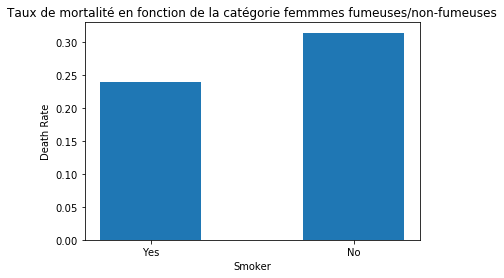

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

height = [death_rate_smoker, death_rate_nosmoker]
x = ["Yes", "No"]
width = 1.0

plt.title("Taux de mortalité en fonction de la catégorie femmmes fumeuses/non-fumeuses")
plt.ylabel(u"Death Rate")
plt.xlabel(u"Smoker")
plt.bar(x, height, width/2)

plt.show()

Ces données sont surprenantes car le taux de mortalité pour les femmes fumeuses est plus petit que celui des femmes non-fumeuses ce qui est contradictoire avec la littérature à ce sujet.

### Partie 2

__Consigne : Reprenez la question 1 (effectifs et taux de mortalité) en rajoutant une nouvelle catégorie liée à la classe d'âge. On considérera par exemple les classes suivantes : 18-34 ans, 34-54 ans, 54-64 ans, plus de 64 ans. En quoi ce résultat est-il surprenant ? Arrivez-vous à expliquer ce paradoxe ? De même, vous pourrez proposer une représentation graphique de ces données pour étayer vos explications.__

On extrait de notre jeu de données les femmes âgées de 18 à 34 ans, puis on applique les étapes de la partie 1.

In [15]:
extract = data[data["Age"]>=18]
extract = extract[extract["Age"]<34]
extract

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
6        No  Alive  23.8
8       Yes  Alive  24.8
10      Yes  Alive  30.0
15       No  Alive  25.1
17       No  Alive  27.1
22       No  Alive  33.4
24       No  Alive  18.0
27       No  Alive  25.8
29       No  Alive  20.2
33       No  Alive  19.4
37      Yes  Alive  29.5
38      Yes   Dead  33.0
44       No  Alive  25.3
47       No  Alive  18.5
49      Yes  Alive  22.1
54       No  Alive  28.4
58       No  Alive  22.9
65      Yes  Alive  33.0
67      Yes  Alive  27.9
71      Yes  Alive  26.2
76       No  Alive  27.6
77      Yes  Alive  31.4
79       No  Alive  18.9
81      Yes  Alive  25.4
84       No  Alive  27.3
86       No  Alive  32.8
91       No  Alive  18.3
92      Yes  Alive  20.2
...     ...    ...   ...
1205     No  Alive  23.2
1207    Yes  Alive  31.4
1208    Yes  Alive  30.0
1213     No  Alive  21.4
1216    Yes  Alive  27.9
1217    Yes  Alive  29.5
1219    Yes  Alive  27.0
1223    Yes  Alive  28.3
1226    Yes  Alive  31.0
1232     No  Alive  28.3
1240    Yes  Alive  29.7
1247     No  Alive  26.0
1250     No  Alive  19.8
1251    Yes  Alive  27.8
1253    Yes  Alive  27.8
1255     No   Dead  28.5
1256     No  Alive  26.7
1260    Yes  Alive  20.4
1263    Yes  Alive  20.9
1265     No  Alive  26.7
1267     No  Alive  33.7
1271    Yes  Alive  24.9
1272     No  Alive  33.0
1274     No  Alive  25.7
1275     No  Alive  19.5
1277     No  Alive  23.4
1297    Yes  Alive  32.7
1301     No  Alive  20.5
1303    Yes  Alive  31.2
1310     No  Alive  22.3

[398 rows x 3 columns]

Pour cette première catégorie d'âge, on extrait les femmes fumeuses (`smoker`) et les femmes non-fumeuses (`nosmoker`), et on extrait à chaque fois le nombre femmes décédées et vivantes avec la fonction `value_counts()`.

In [16]:
smoker = extract[extract["Smoker"]=="Yes"]
smoker
smoker["Status"].value_counts()

Alive    174
Dead       5
Name: Status, dtype: int64

In [17]:
nosmoker = extract[extract["Smoker"]=="No"]
nosmoker
nosmoker["Status"].value_counts()

Alive    213
Dead       6
Name: Status, dtype: int64

On calcule pour cette tranche d'âge les taux de mortalités avec la formule explicité précédemment : 

In [18]:
death_rate_smoker_cat1 = len(smoker[smoker["Status"]=="Dead"])/len(smoker)
death_rate_nosmoker_cat1 = len(nosmoker[nosmoker["Status"]=="Dead"])/len(nosmoker)
print("Taux de mortalité pour les femmes fumeuses : ",death_rate_smoker)
print("Taux de mortalité pour les femmes non-fumeuses : ",death_rate_nosmoker)

Taux de mortalité pour les femmes fumeuses :  0.23883161512027493
Taux de mortalité pour les femmes non-fumeuses :  0.31420765027322406


On fait de même pour les autres tranches d'âges. 

__Tranche 34-54ans__ : 

In [71]:
extract = data[data["Age"]>=34]
extract = extract[extract["Age"]<54]

In [72]:
smoker = extract[extract["Smoker"]=="Yes"]
smoker["Status"].value_counts()

Alive    198
Dead      41
Name: Status, dtype: int64

In [73]:
nosmoker = extract[extract["Smoker"]=="No"]
nosmoker
nosmoker["Status"].value_counts()

Alive    180
Dead      19
Name: Status, dtype: int64

In [74]:
death_rate_smoker_cat2 = len(smoker[smoker["Status"]=="Dead"])/len(smoker)
death_rate_nosmoker_cat2 = len(nosmoker[nosmoker["Status"]=="Dead"])/len(nosmoker)
print("Taux de mortalité pour les femmes fumeuses : ",death_rate_smoker_cat2)
print("Taux de mortalité pour les femmes non-fumeuses : ",death_rate_nosmoker_cat2)

Taux de mortalité pour les femmes fumeuses :  0.17154811715481172
Taux de mortalité pour les femmes non-fumeuses :  0.09547738693467336


__Tranche 54-64ans__ :

In [75]:
extract = data[data["Age"]>=54]
extract = extract[extract["Age"]<64]

In [76]:
smoker = extract[extract["Smoker"]=="Yes"]
smoker["Status"].value_counts()

Alive    64
Dead     51
Name: Status, dtype: int64

In [77]:
nosmoker = extract[extract["Smoker"]=="No"]
nosmoker
nosmoker["Status"].value_counts()

Alive    80
Dead     39
Name: Status, dtype: int64

In [78]:
death_rate_smoker_cat3 = len(smoker[smoker["Status"]=="Dead"])/len(smoker)
death_rate_nosmoker_cat3 = len(nosmoker[nosmoker["Status"]=="Dead"])/len(nosmoker)
print("Taux de mortalité pour les femmes fumeuses : ",death_rate_smoker_cat3)
print("Taux de mortalité pour les femmes non-fumeuses : ",death_rate_nosmoker_cat3)

Taux de mortalité pour les femmes fumeuses :  0.4434782608695652
Taux de mortalité pour les femmes non-fumeuses :  0.3277310924369748


__Tranche plus de 64ans__ :

In [79]:
extract = data[data["Age"]>=64]

In [80]:
smoker = extract[extract["Smoker"]=="Yes"]
smoker["Status"].value_counts()

Dead     42
Alive     7
Name: Status, dtype: int64

In [81]:
nosmoker = extract[extract["Smoker"]=="No"]
nosmoker
nosmoker["Status"].value_counts()

Dead     166
Alive     29
Name: Status, dtype: int64

In [82]:
death_rate_smoker_cat4 = len(smoker[smoker["Status"]=="Dead"])/len(smoker)
death_rate_nosmoker_cat4 = len(nosmoker[nosmoker["Status"]=="Dead"])/len(nosmoker)
print("Taux de mortalité pour les femmes fumeuses : ",death_rate_smoker_cat4)
print("Taux de mortalité pour les femmes non-fumeuses : ",death_rate_nosmoker_cat4)

Taux de mortalité pour les femmes fumeuses :  0.8571428571428571
Taux de mortalité pour les femmes non-fumeuses :  0.8512820512820513


On trace alors les taux de mortalité pour les différentes classes d'âges précédemment calculés.

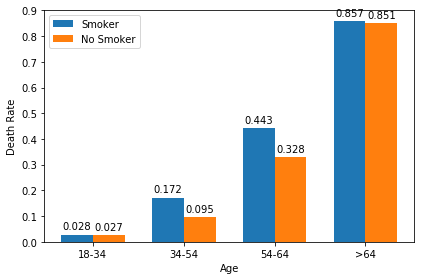

In [31]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['18-34', '34-54', '54-64', '>64']
death_rate_smoker = [death_rate_smoker_cat1, death_rate_smoker_cat2, death_rate_smoker_cat3, death_rate_smoker_cat4]
death_rate_nosmoker = [death_rate_nosmoker_cat1, death_rate_nosmoker_cat2, death_rate_nosmoker_cat3, death_rate_nosmoker_cat4]

death_rate_smoker= np.around(death_rate_smoker, decimals=3)
death_rate_nosmoker= np.around(death_rate_nosmoker, decimals=3)

x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, death_rate_smoker, width, label='Smoker')
rects2 = ax.bar(x + width/2, death_rate_nosmoker, width, label='No Smoker')

ax.set_ylabel('Death Rate')
ax.set_xlabel('Age')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

On remarque que pour les femmes fumeuses ont globalement un taux de mortalité plus élevé à l'intérieur de chacune des classes d'âge, et que la différence est plus marqué pour les classes d'âges moyennes que pour celles extrêmes. On peut penser que pour les jeunes et les personnes âgées, les causes de la mort sont autres que la cigarette. D'où un taux de mortalité quasiement identique. A l'inverse, entre 34 et 64 ans, le fait de fumer entraine une augmentation du taux de mortalité qui semble claire. Logiquement, le taux de mortalité augmente avec l'âge. 

Ce résultat contredit le résultat précédent. C'est lié à des éléments qui ne sont pas pris en compte si on ne considère que le groupe total (comme la présence de variables non indépendantes ou de différences d'effectifs entre les groupes). Regardons de plus près. On calcule l'âge moyen ainsi que l'écart type pour les deux groupes. On utilise la fonction `mean` et la fonction `std` pour cela.  

In [68]:
mean = data[data["Smoker"]=="Yes"]["Age"].mean()
std = data[data["Smoker"]=="Yes"]["Age"].std()
print('L\'age moyen du groupe fumeuses est {0}, avec un écart type de {1}'.format(mean,std))

L'age moyen du groupe fumeuses est 44.26975945017182, avec un écart type de 16.21788646063739


In [70]:
mean = data[data["Smoker"]=="No"]["Age"].mean()
std = data[data["Smoker"]=="No"]["Age"].std()
print('L\'age moyen du groupe non-fumeuses est {0}, avec un écart type de {1}'.format(mean,std))

L'age moyen du groupe non-fumeuses est 49.81584699453551, avec un écart type de 20.89829374608753


Ainsi, le groupe non-fumeuses est significativement plus âgés que le groupe fumeuse. A l'inverse, le groupe fumeuses est moins dispersé en agê. Cela introduit des biais qui expliquent le résulat de la partie 1 obtenu en considérant l'ensemble du groupe et non pas les classe d'âge : ainsi, comme les femmes fumeuses dans nos données sont plus jeunes, elles ont un taux de mortalité __global__ plus petit que celui des femmes non fumeuses, malgré le fait qu'elles fument. 

### Partie 3

__Consigne : Afin d'éviter un biais induit par des regroupements en tranches d'âges arbitraires et non régulières, il est envisageable d'essayer de réaliser une régression logistique. Si on introduit une variable Death valant 1 ou 0 pour indiquer si l'individu est décédé durant la période de 20 ans, on peut étudier le modèle Death ~ Age pour étudier la probabilité de décès en fonction de l'âge selon que l'on considère le groupe des fumeuses ou des non fumeuses. Ces régressions vous permettent-elles de conclure sur la nocivité du tabagisme ? Vous pourrez proposer une représentation graphique de ces régressions (en n'omettant pas les régions de confiance).__

On repart des données initiales, `data`. On va construire deux listes, `data_rate_smoker` et `data_rate_nosmoker` contenant le taux de mortalité à un âge $i$ donné, calculé comme la moyenne du taux de mortalité pour l'intervalle $[i-10,i+10]$, de longueur 20 ans. Pour cela, on reprend les étapes précédentes, en extrayant les femmes dont l'âge est dans l'interval, puis en calculant pour les fumeuses et les non-fumeuses le taux de mortalité. On stocke l'âge $i$ considéré dans une liste `age` pour pouvoir ploter plus facilement un graphique. On fait varier $i$ de 18ans à l'âge maximal

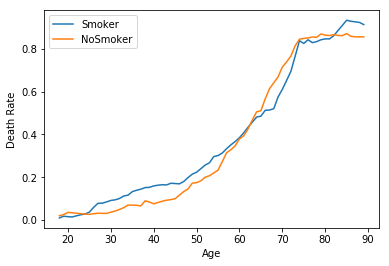

In [34]:
data_rate_smoker = []
data_rate_nosmoker = []
age = []
for i in range(18,int(data["Age"].max())+1):
    extract = data[data["Age"]>=i-10]
    extract = extract[extract["Age"]<i+10]
    nosmoker = extract[extract["Smoker"]=="No"]
    smoker = extract[extract["Smoker"]=="Yes"]
    death_rate_smoker_int = len(smoker[smoker["Status"]=="Dead"])/len(smoker)
    death_rate_nosmoker_int = len(nosmoker[nosmoker["Status"]=="Dead"])/len(nosmoker)
    data_rate_smoker.append(death_rate_smoker_int)
    data_rate_nosmoker.append(death_rate_nosmoker_int)
    age.append(i)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(age,data_rate_smoker,label="Smoker")
plt.plot(age,data_rate_nosmoker,label='NoSmoker')
plt.ylabel("Death Rate")
plt.xlabel("Age")
plt.legend()
plt.show()

On remarque qu'on a bien une surmortalité dans le groupe des fumeurs jusqu'à plus de 60 ans environ. Ensuite, le graphique laisse croire que la surmortalité est plus importante chez les non fumeurs jusque 80ans environ. On n'a pas tracé les intervalles de confiance, qui permettraient de nuancer cela. On remarque une variation brutale du taux de mortalité chez les fumeurs entre 70 et 75ans. Cela laisse penser à un biais statistique dû à une mauvaise répartition des tranches d'âge dans le groupe fumeur, comme on l'a déjà souligné. L'aire entre les courbes jusqu'à leur intersection semble plus grande que celle après l'intersection : malgré ce biais statistique et malgré le fait qu'on a pas les intervalles de confiance, on peut en déduire que le tabac semble être un facteur de surmortalité. 

## Conclusion 

On a vu qu'en prenant le groupe dans son ensemble, les différentes répartitions dans les tranches d'âge entre les fumeuses et les non-fumeuses laissaient penser que le fait de ne pas fumer entrainé une surmortalité. On est bien sûr au courant que c'est l'inverse qui est vrai, et travailler avec des tranches d'âge permet de montrer que le tabac est facteur de surmortalité. C'est un effet classique du [paradoxe de Simpson](https://fr.wikipedia.org/wiki/Paradoxe_de_Simpson) : il s'agit d'un phénomène statistique _dans lequel un phénomène observé de plusieurs groupes semble s'inverser lorsque les groupes sont combinés. Ce résultat qui semble impossible au premier abord est lié à des éléments qui ne sont pas pris en compte (comme la présence de variables non indépendantes ou de différences d'effectifs entre les groupes, etc.) est souvent rencontré dans la réalité, en particulier dans les sciences sociales et les statistiques médicales_. 